# Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load The Dataset

In [7]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df.drop(columns=['Serial No.'], inplace=True)


In [53]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,1
496,337,117,5,5.0,5.0,9.87,1,1
497,330,120,5,4.5,5.0,9.56,1,1
498,312,103,4,4.0,5.0,8.43,0,0


# Data Preprocessing

In [9]:
print(df.isnull().sum())


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [10]:
df['Admit'] = df['Chance of Admit '].apply(lambda x: 1 if x >= 0.75 else 0)
df.drop(columns=['Chance of Admit '], inplace=True)


#  Exploratory Data Analysis (EDA)

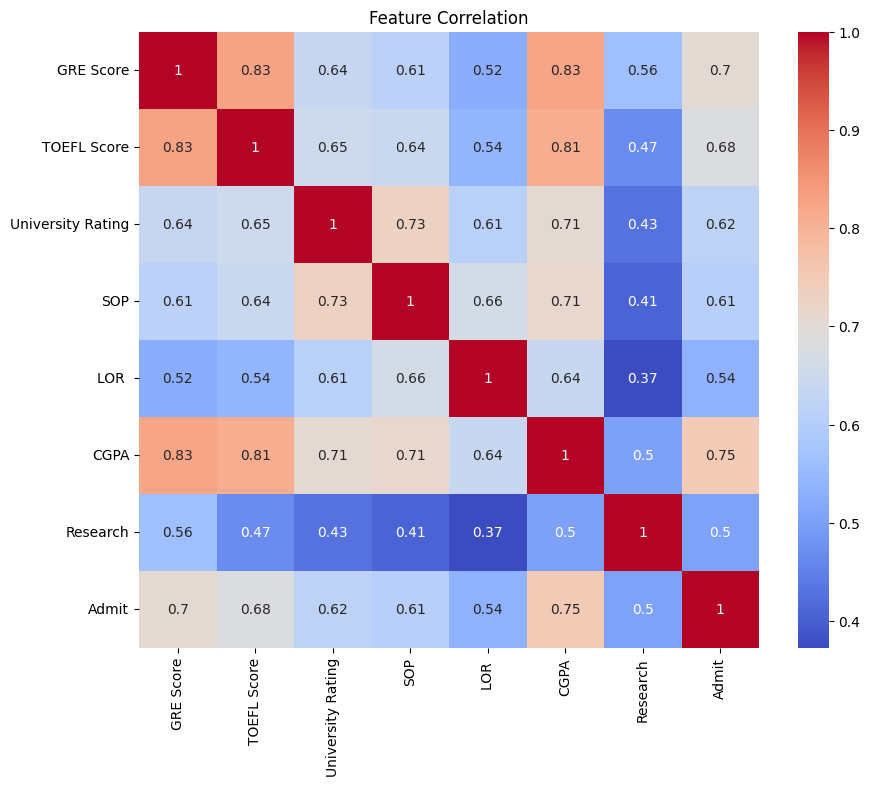

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


# Feature Selection and Scaling

In [12]:
X = df.drop('Admit', axis=1)
y = df['Admit']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-Test-Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Model Training (Random Forest Classifier)

In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Evaluation(using scatter plot)

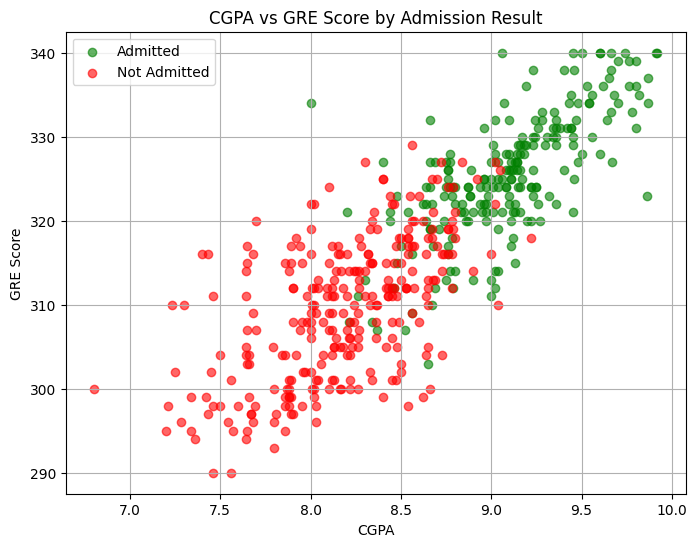

In [38]:
# Separate admitted and not admitted for different colors
admitted = df[df['Admit'] == 1]
not_admitted = df[df['Admit'] == 0]

plt.figure(figsize=(8,6))

# Plot admitted (label 1)
plt.scatter(admitted['CGPA'], admitted['GRE Score'], c='green', label='Admitted', alpha=0.6)

# Plot not admitted (label 0)
plt.scatter(not_admitted['CGPA'], not_admitted['GRE Score'], c='red', label='Not Admitted', alpha=0.6)

plt.title("CGPA vs GRE Score by Admission Result")
plt.xlabel("CGPA")
plt.ylabel("GRE Score")
plt.legend()
plt.grid(True)
plt.show()


# Evaluation(using confusion matrix)

Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89        64
           1       0.78      0.89      0.83        36

    accuracy                           0.87       100
   macro avg       0.86      0.87      0.86       100
weighted avg       0.88      0.87      0.87       100



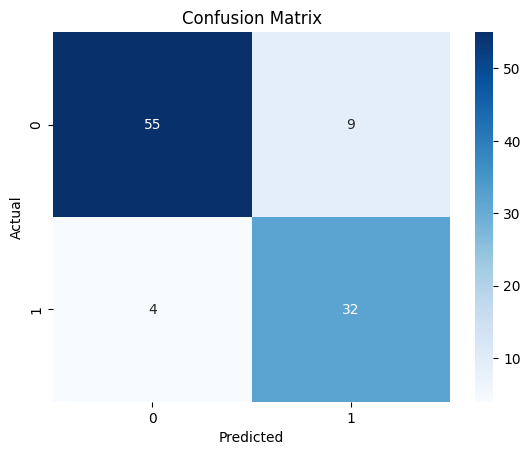

In [52]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Predict New Student Admission

In [ ]:
gre = float(input("Enter GRE Score (e.g., 320): "))
toefl = float(input("Enter TOEFL Score (e.g., 110): "))
univ_rating = float(input("Enter University Rating (1 to 5): "))
sop = float(input("Enter SOP strength (1.0 to 5.0): "))
lor = float(input("Enter LOR strength (1.0 to 5.0): "))
cgpa = float(input("Enter CGPA (e.g., 9.0): "))
research = int(input("Have Research Experience? (1 = Yes, 0 = No): "))

# create a  data frame
user_input = pd.DataFrame([[gre, toefl, univ_rating, sop, lor, cgpa, research]],
                          columns=['GRE Score', 'TOEFL Score', 'University Rating',
                                   'SOP', 'LOR ', 'CGPA', 'Research'])

# Scale input using the fitted scaler
user_scaled = scaler.transform(user_input)

# Predict
result = model.predict(user_scaled)

print("\n🎓 Admission Prediction:")
print("✅ Admitted" if result[0] == 1 else "❌ Not Admitted")


# Model Accuracy

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\n📊 Model Accuracy on Test Data: {accuracy * 100:.2f}%")


📊 Model Accuracy on Test Data: 87.00%
